In [182]:
# Import Packages
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
import missingno as msno
import warnings

# Ignores Warnings
warnings.filterwarnings('ignore')

# Pulls DOHMH_New_York_City_Restaurant_Inspection_Results CSV file into a Data Frame
df = pd.read_csv('DOHMH_New_York_City_Restaurant_Inspection_Results.csv')
df


,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,INSPECTION YEAR,...,RECORD DATE,INSPECTION TYPE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
0,41629922,SOTTO 13,Manhattan,140,WEST 13 STREET,10011.0,2126471001,Italian,11/16/17,2017,...,05-29-2021,Cycle Inspection / Initial Inspection,40.737176,-73.998585,102.0,3.0,7100.0,1010606.0,1.006080e+09,MN23
1,50064086,LITTLE ITALY,Manhattan,180,VARICK STREET,10014.0,2123664848,Pizza,7/5/17,2017,...,05-29-2021,Pre-permit (Operational) / Re-inspection,40.727473,-74.005480,102.0,3.0,3700.0,1008117.0,1.005190e+09,MN24
2,50059373,CHARLES PAN FRIED CHICKEN,Manhattan,2461,FREDERICK DOUGLASS BOULEVARD,NaN,2122811800,Chicken,1/16/20,2020,...,05-29-2021,Cycle Inspection / Reopening Inspection,0.000000,0.000000,NaN,NaN,NaN,NaN,1.000000e+00,NaN
3,41525152,"DUNKIN',' BASKIN ROBBINS",Queens,179-15,HILLSIDE AVENUE,11432.0,7186581728,Donuts,3/7/18,2018,...,05-29-2021,Cycle Inspection / Initial Inspection,40.712645,-73.783838,408.0,24.0,46600.0,4458042.0,4.099370e+09,QN06
4,40605319,42ND STREET PIZZA DINER,Manhattan,647,WEST 42 STREET,10036.0,2125944312,American,3/6/18,2018,...,05-29-2021,Cycle Inspection / Initial Inspection,40.761533,-73.999996,104.0,3.0,12900.0,1027089.0,1.010900e+09,MN15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
419010,41615409,HOT KITCHEN,Manhattan,104,2 AVENUE,10003.0,2122283090,Chinese,11/1/18,2018,...,05-29-2021,Cycle Inspection / Initial Inspection,40.727478,-73.988465,103.0,2.0,3800.0,1006262.0,1.004480e+09,MN22
419011,50080616,TAJ MAHAL RESTAURANT,Queens,14801,HILLSIDE AVE,11435.0,7182972201,Indian,7/1/19,2019,...,05-29-2021,Cycle Inspection / Initial Inspection,40.705968,-73.808927,408.0,24.0,23800.0,4207425.0,4.097040e+09,QN61
419012,41371387,FAIRFIELD INN,Queens,2866,COLLEGE POINT BOULEVARD,11354.0,7188889979,American,10/23/18,2018,...,05-29-2021,Cycle Inspection / Initial Inspection,40.771533,-73.844055,407.0,19.0,90700.0,4570029.0,4.043220e+09,QN23
419013,50070146,SWEETGREEN,Manhattan,1114,6 AVENUE,10036.0,9146023590,Salads,2/21/19,2019,...,05-29-2021,Cycle Inspection / Initial Inspection,40.755345,-73.983732,105.0,4.0,9600.0,1034196.0,1.012580e+09,MN17


In [183]:
# Show the Percent and Total of the various fields that are not null

ttl = df.isnull().sum().sort_values(ascending = False)
pct = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
md = pd.concat([ttl, pct], axis=1, keys=['Total', 'Percent'])

md.head()


,Total,Percent
GRADE DATE,207256,49.462668
GRADE,204797,48.875816
SCORE,19862,4.740164
BIN,9859,2.352899
VIOLATION CODE,9808,2.340728


In [184]:
# Shows all the null values in each of the fields

df.isnull().sum()


CAMIS                         0
DBA                        1009
BORO                          0
BUILDING                    835
STREET                       80
ZIPCODE                    6821
PHONE                        40
CUISINE DESCRIPTION        4460
INSPECTION DATE               0
INSPECTION YEAR               0
ACTION                     4460
VIOLATION CODE             9808
VIOLATION DESCRIPTION      7018
CRITICAL FLAG              7017
SCORE                     19862
GRADE                    204797
GRADE DATE               207256
RECORD DATE                   0
INSPECTION TYPE            4460
Latitude                    511
Longitude                   511
Community Board            7889
Council District           7889
Census Tract               7889
BIN                        9859
BBL                        1148
NTA                        7889
dtype: int64

In [185]:
# Removes the null records

df = df.dropna()


In [186]:
# Shows the name of all the columns, count of each field, and the data type

df['INSPECTION DATE'] = df[['INSPECTION DATE']].apply(pd.to_datetime)
df['GRADE DATE'] = df[['GRADE DATE']].apply(pd.to_datetime)
df['RECORD DATE'] = df[['RECORD DATE']].apply(pd.to_datetime)
df['ZIPCODE'] = df['ZIPCODE'].astype('int')
df['SCORE'] = df['SCORE'].astype('int')


df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 205165 entries, 0 to 419014
Data columns (total 27 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   CAMIS                  205165 non-null  int64         
 1   DBA                    205165 non-null  object        
 2   BORO                   205165 non-null  object        
 3   BUILDING               205165 non-null  object        
 4   STREET                 205165 non-null  object        
 5   ZIPCODE                205165 non-null  int64         
 6   PHONE                  205165 non-null  object        
 7   CUISINE DESCRIPTION    205165 non-null  object        
 8   INSPECTION DATE        205165 non-null  datetime64[ns]
 9   INSPECTION YEAR        205165 non-null  int64         
 10  ACTION                 205165 non-null  object        
 11  VIOLATION CODE         205165 non-null  object        
 12  VIOLATION DESCRIPTION  205165 non-null  obje

In [113]:
# Shows the various statistics for Score

df['SCORE'].describe()


count    205165.000000
mean         12.659459
std           7.959420
min          -1.000000
25%           9.000000
50%          12.000000
75%          13.000000
max          99.000000
Name: SCORE, dtype: float64

Text(0.5, 0, 'Score')

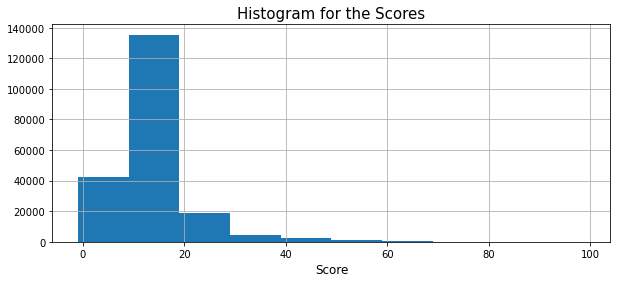

In [187]:
# Histogram for Scores

df.SCORE.hist(figsize=(10,4))
plt.title("Histogram for the Scores", fontsize=15)
plt.xlabel('Score', fontsize = 12)

Text(0.5, 1.0, 'Distribution Plot of the Scores')

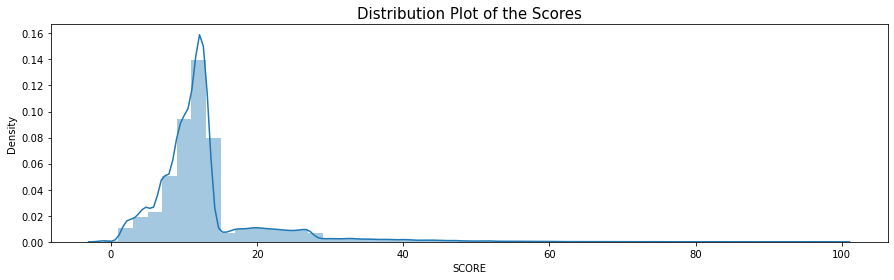

In [188]:
# Density of Score

fig, ax = plt.subplots()
fig.set_size_inches(15, 4)
sns.distplot(df.SCORE.dropna())
plt.title("Distribution Plot of the Scores", fontsize=15)


In [116]:
# Count of Grade

df.GRADE.value_counts()


A    165686
B     26296
C     10051
P      2594
Z       528
N         7
G         3
Name: GRADE, dtype: int64

Text(0.5, 0, 'Grades')

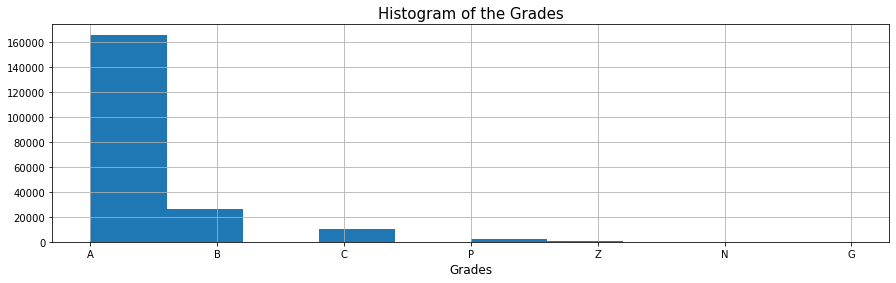

In [117]:
# Histogram of Grades

df.GRADE.hist(figsize = (15, 4))
plt.title("Histogram of the Grades", fontsize=15)
plt.xlabel('Grades', fontsize = 12)


Text(0.5, 1.0, 'Boxplot by Grade')

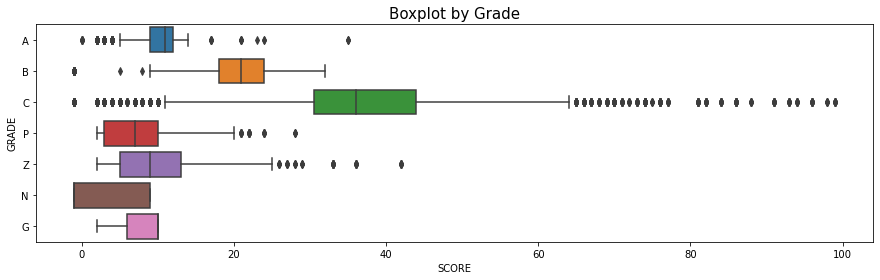

In [189]:
# Box plot of Grades

fig, ax = plt.subplots()
fig.set_size_inches(15, 4)
sns.boxplot(df.SCORE.dropna(), df.GRADE)
plt.title('Boxplot by Grade', fontsize = 15)


In [119]:
# Counts of Boroughs

df.BORO.value_counts()


Manhattan        79821
Brooklyn         52372
Queens           46630
Bronx            19191
Staten Island     7151
Name: BORO, dtype: int64

Text(0.5, 0, 'Borough')

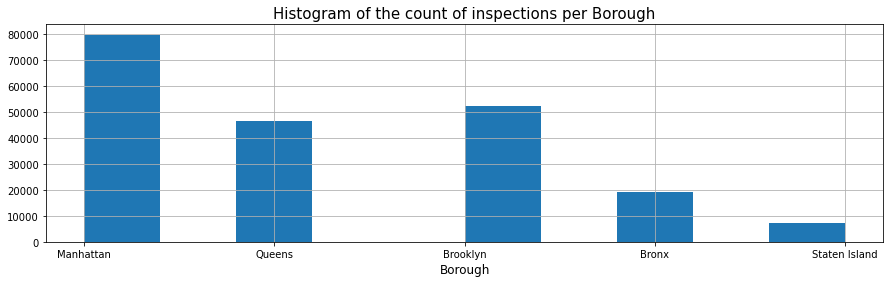

In [190]:
# Histogram of the number of inspections per a borough

df.BORO.hist(figsize = (15, 4))
plt.title('Histogram of the count of inspections per Borough', fontsize = 15)
plt.xlabel('Borough', fontsize = 12)


In [121]:
# Count of letter Grades for each Borough

bgrade = pd.crosstab(df.GRADE, df.BORO, margins = True)
bgrade


BORO,Bronx,Brooklyn,Manhattan,Queens,Staten Island,All
GRADE,,,,,,
A,14913,42215,65020,37625,5913,165686
B,2852,6812,9795,5957,880,26296
C,1112,2401,3937,2330,271,10051
G,0,3,0,0,0,3
N,4,3,0,0,0,7
P,237,781,903,607,66,2594
Z,73,157,166,111,21,528
All,19191,52372,79821,46630,7151,205165


Text(0.5, 1.0, 'Grade Distribution by Borough')

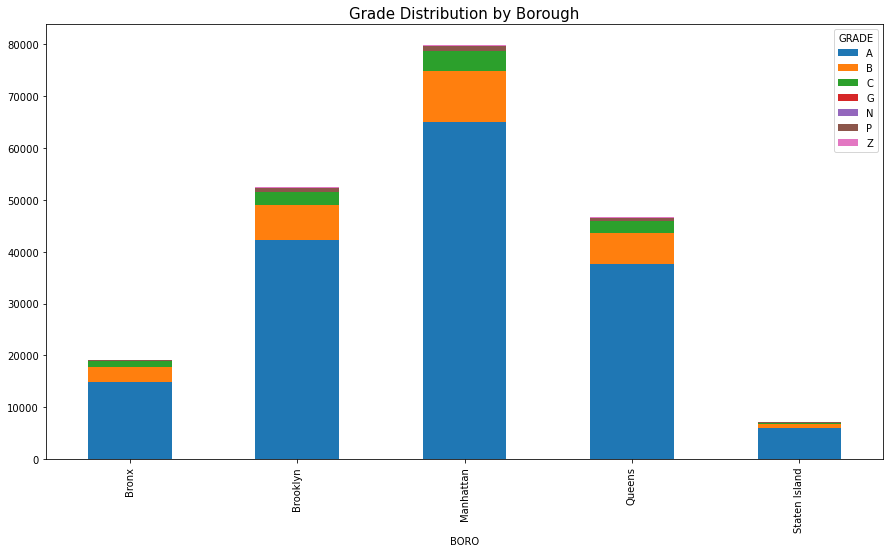

In [191]:
# Grade Distribution by Borough

pd.crosstab(df.BORO, df.GRADE).plot(kind="bar", figsize=(15,8), stacked=True)
plt.title('Grade Distribution by Borough', fontsize = 15)


([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

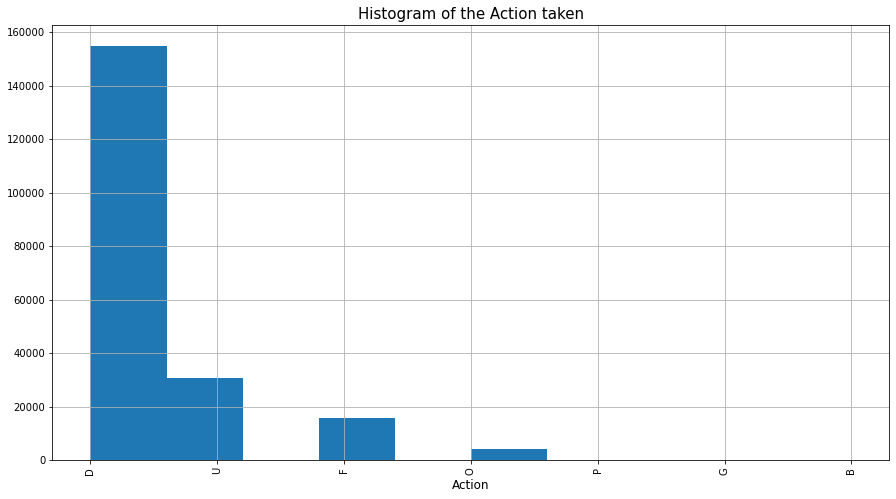

In [123]:
# Histogram of Action Taken

df.ACTION.hist(figsize = (15,8))
plt.title('Histogram of the Action taken', fontsize = 15)
plt.xlabel('Action', fontsize = 12)
plt.xticks(rotation=90)


Text(0.5, 0, 'Flag')

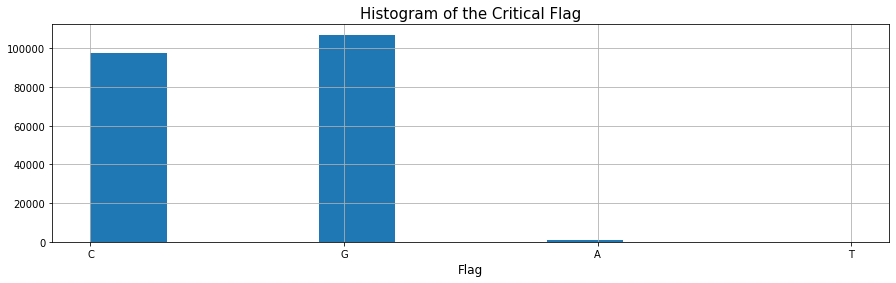

In [124]:
# Histogram of Critical Flage

df['CRITICAL FLAG'].hist(figsize=(15,4))
plt.title('Histogram of the Critical Flag', fontsize = 15)
plt.xlabel('Flag', fontsize = 12)


Text(0.5, 1.0, 'Critical Flag by Borough')

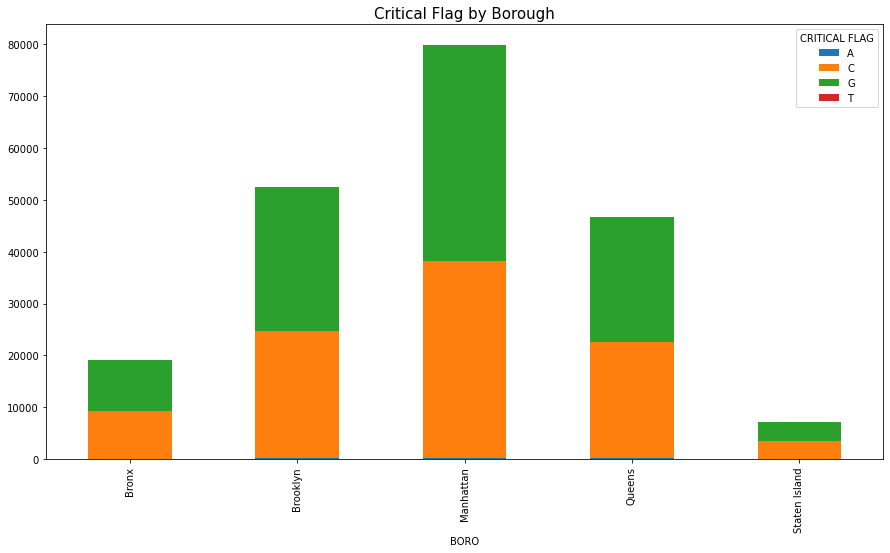

In [125]:
# Critical Flag by Borough

pd.crosstab(df.BORO, df['CRITICAL FLAG']).plot(kind="bar", figsize=(15,8), stacked=True)
plt.title('Critical Flag by Borough', fontsize = 15)


No handles with labels found to put in legend.


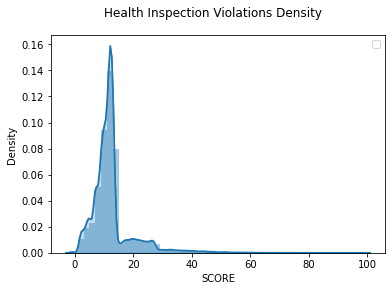

In [195]:
# The KDE plot below shows us that most restaurants have few health inspection violations.

fig, ax = plt.subplots()

sns.kdeplot(df["SCORE"], shade=True, ax=ax)
seabornInstance.distplot(df['SCORE'])
ax.legend()

fig.suptitle("Health Inspection Violations Density")

plt.show()


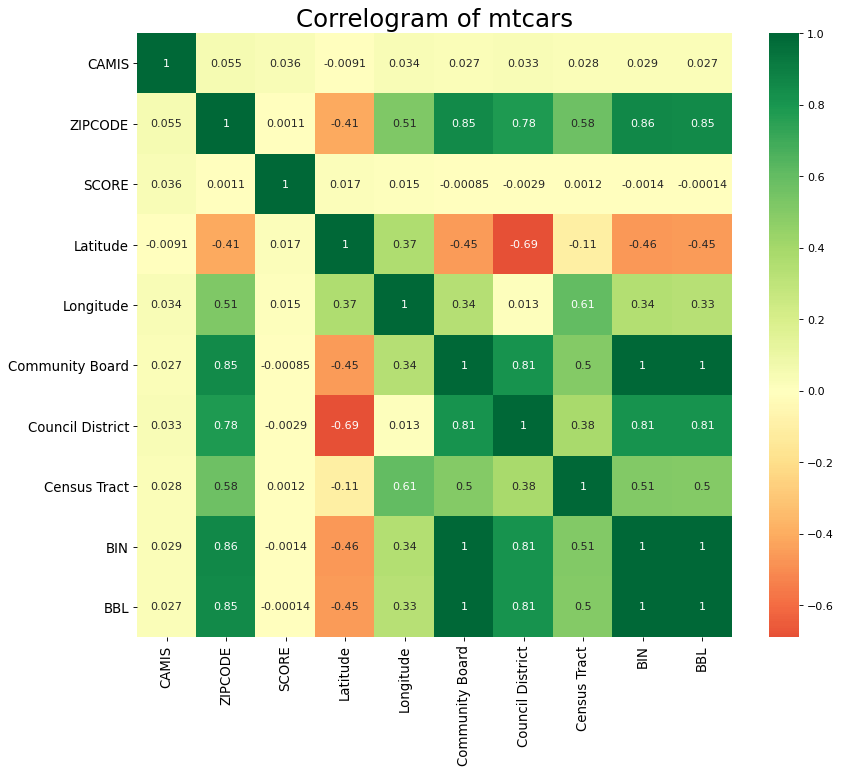

In [127]:
# Plot
plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(df.corr(), xticklabels=df.corr().columns, yticklabels=df.corr().columns, cmap='RdYlGn', center=0, annot=True)

# Decorations
plt.title('Correlogram of mtcars', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [128]:

import numpy as np
import matplotlib.pyplot as plt  # To visualize
import pandas as pd  # To read data
from sklearn.linear_model import LinearRegression


In [129]:
# Linear Regression of ZIP Code and Score

X = df.iloc[:, 5].values.reshape(-1, 1)  # values converts it into a numpy array
Y = df.iloc[:, 13].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions



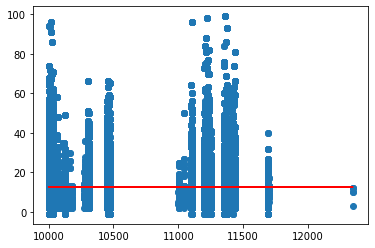

In [130]:
# Plot of the Linear Regression

plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()
